# **Importing Libraries**

In [122]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

# **Loading Mnist Dataset and Displaying Details**

In [123]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [124]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [125]:
pixels = pd.DataFrame(mnist.data)
labels = pd.DataFrame(mnist.target)

In [126]:
pixels.loc[0].values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [127]:
labels.loc[0].values

['5']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

# **Displaying 5 Images with corresponding labels**

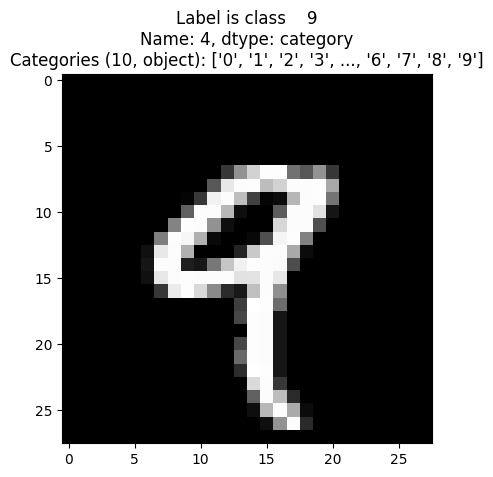

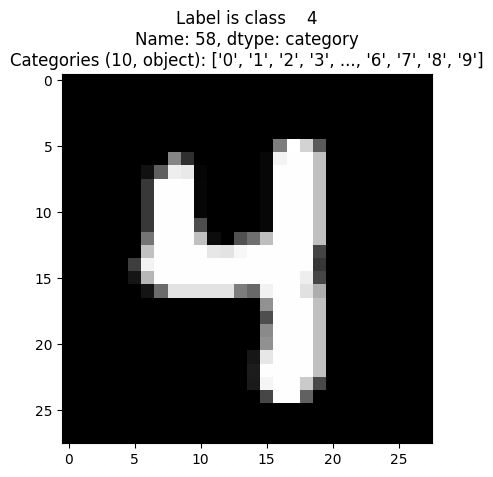

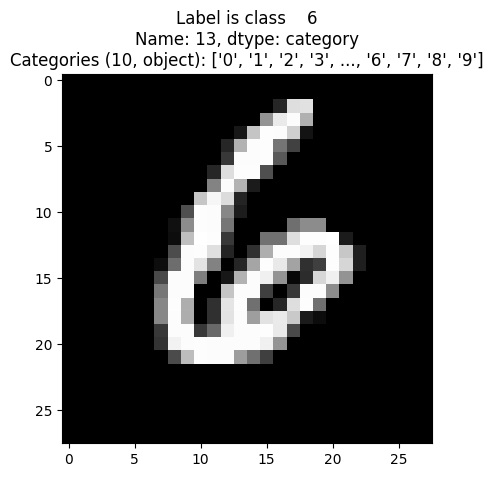

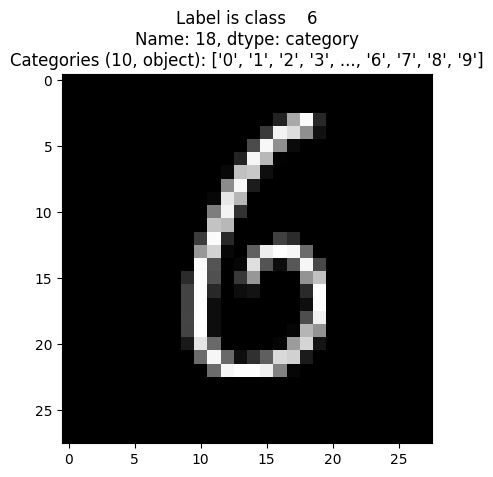

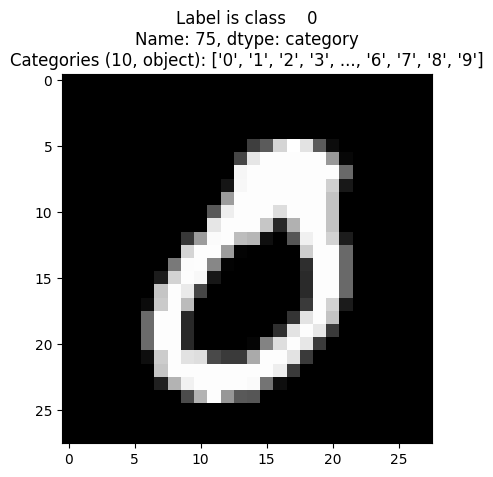

In [128]:
randomNolist=[]
for i in range(5):
  randomNolist.append(random.randint(0,100))
for i in randomNolist:
  label = labels.loc[i]
  pixel = pixels.loc[i]
  pixel = np.array(pixel, dtype='uint8')
  pixel = pixel.reshape((28,28))
  plt.title('Label is {label}'.format(label=label))
  plt.imshow(pixel, cmap='gray')
  plt.show()

# **Data representation/vectorization**

In [129]:
# Checking if vectorization is Required
pixels.shape

(70000, 784)

# **Data normalization**

Note: As Shape is 784 for pixels it means that Image is already flattend t0 784-dimensional vector. Hence, no vectorization required

In [130]:
# Checking if normalization is required
max(pixels.loc[0])

255.0

In [131]:
# Normalizing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
normalized_values = min_max_scaler.fit_transform(pixels.values)
normalized_df = pd.DataFrame(normalized_values, columns=pixels.columns)
max(normalized_df.loc[0])

1.0

# **Data splitting (Training + Testing) – try 80:20, 50:50, 20:80, 1:99**

## 80:20 Split

In [132]:
X_train80, X_test20, y_train80, y_test20 = train_test_split(normalized_df, labels, test_size=0.20, random_state=42)

## 50:50 Split

In [133]:
X_train50, X_test50, y_train50, y_test50 = train_test_split(normalized_df, labels, test_size=0.50, random_state=42)

## 20:80 Split

In [134]:
X_train20, X_test80, y_train20, y_test80 = train_test_split(normalized_df, labels, test_size=0.80, random_state=42)

## 1:99 Split

In [135]:
X_train1, X_test99, y_train1, y_test99 = train_test_split(normalized_df, labels, test_size=0.99, random_state=42)

# **Model selection (try different ML models)**

## **For 80:20 Dataset**

### **Random Forest Classifier**

In [136]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train80, y_train80)

<ipython-input-136-f73ec8398ecd>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train80, y_train80)


RandomForestClassifier()

In [137]:
y_pred80 = model.predict(X_test80)

In [138]:
model.score(X_test80, y_test80)

0.9918928571428571

In [139]:
accuracy_score(y_pred80, y_test80)

0.9918928571428571

### **K-Nearnest Neighbours(KnN)**

In [140]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train80, y_train80)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [141]:
classifier = SVC()
classifier.fit(X_train80,y_train80)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [142]:
classifiers = [
    ("SVC", SVC(kernel='linear')),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
]

In [143]:
for clf_name, classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train80, y_train80)

    # Make predictions
    test_predictions = classifier.predict(X_test80)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_pred80, y_test80)

    # Print evaluation metrics
    print(f"Classifier: {clf_name}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("----------------------------------------------------")

    print("\nClassification Report for Test Set:")
    print(classification_report(y_pred80, test_predictions))
    print("----------------------------------------------------")
    print("\nConfusion Matrix for Test Set:")
    print(confusion_matrix(y_pred80, test_predictions))
    print("\n" + "="*40 + "\n")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier: SVC
Test Accuracy: 0.9919
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5533
           1       0.98      0.99      0.99      6265
           2       0.96      0.96      0.96      5613
           3       0.94      0.95      0.95      5710
           4       0.96      0.97      0.97      5463
           5       0.95      0.94      0.95      5035
           6       0.98      0.98      0.98      5519
           7       0.97      0.97      0.97      5859
           8       0.96      0.94      0.95      5447
           9       0.95      0.94      0.95      5556

    accuracy                           0.96     56000
   macro avg       0.96      0.96      0.96     56000
weighted avg       0.96      0.96      0.96     56000

----------------------------------------------------

Confusion Matrix for Test Set:
[[5477    1    4    2    1  

<ipython-input-143-e29563b28e27>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train80, y_train80)


Classifier: Random Forest
Test Accuracy: 0.9919
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5533
           1       1.00      1.00      1.00      6265
           2       1.00      0.99      1.00      5613
           3       0.99      0.99      0.99      5710
           4       1.00      1.00      1.00      5463
           5       1.00      0.99      0.99      5035
           6       1.00      1.00      1.00      5519
           7       1.00      1.00      1.00      5859
           8       0.99      0.99      0.99      5447
           9       0.99      1.00      1.00      5556

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000

----------------------------------------------------

Confusion Matrix for Test Set:
[[5523    0    1  

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classifier: K-Nearest Neighbors
Test Accuracy: 0.9919
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5533
           1       0.97      1.00      0.98      6265
           2       0.99      0.97      0.98      5613
           3       0.97      0.98      0.98      5710
           4       0.98      0.97      0.98      5463
           5       0.98      0.97      0.97      5035
           6       0.98      0.99      0.99      5519
           7       0.97      0.98      0.98      5859
           8       0.99      0.95      0.97      5447
           9       0.97      0.97      0.97      5556

    accuracy                           0.98     56000
   macro avg       0.98      0.98      0.98     56000
weighted avg       0.98      0.98      0.98     56000

----------------------------------------------------

Confusion Matrix for Test Set:
[[5500    4 

## **For 50:50 Dataset**

### **Random Forest Classifier**

In [144]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train50, y_train50)

<ipython-input-144-1dd153bd6834>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train50, y_train50)


RandomForestClassifier()

In [145]:
y_pred50 = model.predict(X_test50)

In [146]:
model.score(X_test50, y_test50)

0.9639142857142857

In [147]:
accuracy_score(y_pred50, y_test50)

0.9639142857142857

### **K-Nearnest Neighbours(KnN)**

In [148]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train50, y_train50)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [149]:
classifier = SVC()
classifier.fit(X_train50,y_train50)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [150]:
classifiers = [
    ("SVC", SVC(kernel='linear')),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
]

In [151]:
for clf_name, classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train50, y_train50)

    # Make predictions
    test_predictions = classifier.predict(X_test50)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_pred50, y_test50)

    # Print evaluation metrics
    print(f"Classifier: {clf_name}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("----------------------------------------------------")

    print("\nClassification Report for Test Set:")
    print(classification_report(y_pred50, test_predictions))
    print("----------------------------------------------------")
    print("\nConfusion Matrix for Test Set:")
    print(confusion_matrix(y_pred50, test_predictions))
    print("\n" + "="*40 + "\n")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier: SVC
Test Accuracy: 0.9639
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3494
           1       0.95      0.99      0.97      3927
           2       0.92      0.92      0.92      3570
           3       0.91      0.93      0.92      3523
           4       0.92      0.94      0.93      3346
           5       0.91      0.91      0.91      3103
           6       0.97      0.94      0.95      3541
           7       0.94      0.95      0.94      3671
           8       0.94      0.89      0.91      3304
           9       0.93      0.89      0.91      3521

    accuracy                           0.93     35000
   macro avg       0.93      0.93      0.93     35000
weighted avg       0.93      0.93      0.93     35000

----------------------------------------------------

Confusion Matrix for Test Set:
[[3394    1   17    4    2  

<ipython-input-151-01ae47659313>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train50, y_train50)


Classifier: Random Forest
Test Accuracy: 0.9639
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3494
           1       0.99      1.00      0.99      3927
           2       0.98      0.98      0.98      3570
           3       0.98      0.98      0.98      3523
           4       0.98      0.98      0.98      3346
           5       0.97      0.98      0.98      3103
           6       0.99      0.99      0.99      3541
           7       0.98      0.99      0.99      3671
           8       0.98      0.97      0.97      3304
           9       0.98      0.98      0.98      3521

    accuracy                           0.98     35000
   macro avg       0.98      0.98      0.98     35000
weighted avg       0.98      0.98      0.98     35000

----------------------------------------------------

Confusion Matrix for Test Set:
[[3464    0    5  

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classifier: K-Nearest Neighbors
Test Accuracy: 0.9639
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3494
           1       0.95      1.00      0.97      3927
           2       0.98      0.94      0.96      3570
           3       0.95      0.96      0.96      3523
           4       0.97      0.96      0.97      3346
           5       0.95      0.96      0.96      3103
           6       0.98      0.98      0.98      3541
           7       0.95      0.97      0.96      3671
           8       0.98      0.92      0.95      3304
           9       0.95      0.96      0.95      3521

    accuracy                           0.96     35000
   macro avg       0.96      0.96      0.96     35000
weighted avg       0.96      0.96      0.96     35000

----------------------------------------------------

Confusion Matrix for Test Set:
[[3433    2 

## **For 20:80 Dataset**

### **Random Forest Classifier**

In [152]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train20, y_train20)

<ipython-input-152-5ccc66123cb9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train20, y_train20)


RandomForestClassifier()

In [153]:
y_pred20 = model.predict(X_test80)

In [154]:
model.score(X_test80, y_test80)

0.9530535714285714

In [155]:
accuracy_score(y_pred20, y_test80)

0.9530535714285714

### **K-Nearnest Neighbours(KnN)**

In [156]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train20, y_train20)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [157]:
classifier = SVC()
classifier.fit(X_train20,y_train20)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [158]:
classifiers = [
    ("SVC", SVC(kernel='linear')),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
]

In [159]:
for clf_name, classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train20, y_train20)

    # Make predictions
    test_predictions = classifier.predict(X_test80)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_pred20, y_test80)

    # Print evaluation metrics
    print(f"Classifier: {clf_name}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("----------------------------------------------------")

    print("\nClassification Report for Test Set:")
    print(classification_report(y_pred20, test_predictions))
    print("----------------------------------------------------")
    print("\nConfusion Matrix for Test Set:")
    print(confusion_matrix(y_pred20, test_predictions))
    print("\n" + "="*40 + "\n")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier: SVC
Test Accuracy: 0.9531
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5605
           1       0.96      0.98      0.97      6332
           2       0.90      0.91      0.91      5678
           3       0.90      0.91      0.90      5616
           4       0.91      0.94      0.93      5498
           5       0.88      0.89      0.89      5038
           6       0.96      0.95      0.95      5556
           7       0.94      0.94      0.94      5753
           8       0.92      0.87      0.89      5319
           9       0.92      0.88      0.90      5605

    accuracy                           0.92     56000
   macro avg       0.92      0.92      0.92     56000
weighted avg       0.92      0.92      0.92     56000

----------------------------------------------------

Confusion Matrix for Test Set:
[[5436    0   39   19    4  

<ipython-input-159-329a94f7f18a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train20, y_train20)


Classifier: Random Forest
Test Accuracy: 0.9531
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5605
           1       0.99      0.99      0.99      6332
           2       0.98      0.97      0.98      5678
           3       0.96      0.97      0.97      5616
           4       0.98      0.97      0.98      5498
           5       0.97      0.96      0.97      5038
           6       0.98      0.98      0.98      5556
           7       0.98      0.99      0.98      5753
           8       0.97      0.97      0.97      5319
           9       0.97      0.97      0.97      5605

    accuracy                           0.98     56000
   macro avg       0.98      0.98      0.98     56000
weighted avg       0.98      0.98      0.98     56000

----------------------------------------------------

Confusion Matrix for Test Set:
[[5556    0    8  

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classifier: K-Nearest Neighbors
Test Accuracy: 0.9531
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5605
           1       0.93      0.99      0.96      6332
           2       0.97      0.91      0.94      5678
           3       0.93      0.95      0.94      5616
           4       0.97      0.94      0.95      5498
           5       0.93      0.94      0.94      5038
           6       0.97      0.97      0.97      5556
           7       0.94      0.97      0.95      5753
           8       0.97      0.89      0.93      5319
           9       0.94      0.94      0.94      5605

    accuracy                           0.95     56000
   macro avg       0.95      0.95      0.95     56000
weighted avg       0.95      0.95      0.95     56000

----------------------------------------------------

Confusion Matrix for Test Set:
[[5499    1 

## **For 1:99 Dataset**

### **Random Forest Classifier**

In [160]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train1, y_train1)

<ipython-input-160-9f9163a9de34>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train1, y_train1)


RandomForestClassifier()

In [161]:
y_pred1 = model.predict(X_test99)

In [162]:
model.score(X_test99, y_test99)

0.8712121212121212

In [163]:
accuracy_score(y_pred1, y_test99)

0.8712121212121212

### **K-Nearnest Neighbours(KnN)**

In [164]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [165]:
classifier = SVC()
classifier.fit(X_train1,y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [166]:
classifiers = [
    ("SVC", SVC(kernel='linear')),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
]

In [167]:
for clf_name, classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train1, y_train1)

    # Make predictions
    test_predictions = classifier.predict(X_test99)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_pred1, y_test99)

    # Print evaluation metrics
    print(f"Classifier: {clf_name}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("----------------------------------------------------")

    print("\nClassification Report for Test Set:")
    print(classification_report(y_pred1, test_predictions))
    print("----------------------------------------------------")
    print("\nConfusion Matrix for Test Set:")
    print(confusion_matrix(y_pred1, test_predictions))
    print("\n" + "="*40 + "\n")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier: SVC
Test Accuracy: 0.8712
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      6961
           1       0.95      0.94      0.94      8761
           2       0.86      0.88      0.87      6005
           3       0.86      0.81      0.84      7412
           4       0.86      0.89      0.87      6849
           5       0.77      0.89      0.83      5556
           6       0.93      0.91      0.92      7689
           7       0.95      0.89      0.92      6871
           8       0.85      0.84      0.84      6297
           9       0.87      0.85      0.86      6899

    accuracy                           0.89     69300
   macro avg       0.88      0.88      0.88     69300
weighted avg       0.89      0.89      0.89     69300

----------------------------------------------------

Confusion Matrix for Test Set:
[[6575    0   74   29   14  

<ipython-input-167-2f2cccb19657>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train1, y_train1)


Classifier: Random Forest
Test Accuracy: 0.8712
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6961
           1       0.96      0.97      0.97      8761
           2       0.92      0.93      0.93      6005
           3       0.90      0.89      0.90      7412
           4       0.93      0.89      0.91      6849
           5       0.88      0.90      0.89      5556
           6       0.95      0.93      0.94      7689
           7       0.95      0.95      0.95      6871
           8       0.90      0.91      0.91      6297
           9       0.89      0.91      0.90      6899

    accuracy                           0.93     69300
   macro avg       0.92      0.93      0.92     69300
weighted avg       0.93      0.93      0.93     69300

----------------------------------------------------

Confusion Matrix for Test Set:
[[6731    0   27  

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classifier: K-Nearest Neighbors
Test Accuracy: 0.8712
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6961
           1       0.80      0.98      0.88      8761
           2       0.92      0.81      0.86      6005
           3       0.87      0.82      0.84      7412
           4       0.86      0.79      0.83      6849
           5       0.81      0.83      0.82      5556
           6       0.93      0.89      0.91      7689
           7       0.82      0.92      0.87      6871
           8       0.93      0.77      0.84      6297
           9       0.79      0.81      0.80      6899

    accuracy                           0.86     69300
   macro avg       0.87      0.86      0.86     69300
weighted avg       0.87      0.86      0.86     69300

----------------------------------------------------

Confusion Matrix for Test Set:
[[6572   16 